<a href="https://colab.research.google.com/github/sachinbluechip/Motion-of-Cartpole-using-RL/blob/main/Make_cartpole_using_RL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!apt-get install -y xvfb python-opengl x11-utils
!apt-get install -y --no-install-recommends ffmpeg
!pip install ffmpeg
!pip install gym pyvirtualdisplay scikit-video #> /dev/null 2>&1
#!pip install 'gym[box2d]'
!pip install atari_py

#%tensorflow_version 2.x
import tensorflow as tf

import numpy as np
import base64, io, time, gym
import IPython, functools
import matplotlib.pyplot as plt
from tqdm import tqdm

!pip install mitdeeplearning
import mitdeeplearning as mdl

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
E: Unable to locate package python-opengl
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
  Preparing metadata (setup.py) ... done
  Created wheel for ffmpeg: filename=ffmpeg-1.4-py3-none-any.whl size=6082 sha256=49274a0bfaabb3cea1bd0dcaaffc985b96a96a215a9c983783d3f5dfbdfe0680
  Stored in directory: /root/.cache/pip/wheels/8e/7a/69/cd6aeb83b126a7f04cbe7c9d929028dc52a6e7d525ff56003a
Successfully built ffmpeg
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.6/540.6 kB 7.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for atari_py: filename=atari_py-0.2.9-cp310-cp310-linux_x86_64.whl size=2871249 sha256=c305861f6

In [ ]:
### Instantiate the Cartpole environment ###

env = gym.make("CartPole-v0")
env.seed(1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/gym/envs/registration.py:593: UserWarning: WARN: The environment CartPole-v0 is out of date. You should consider upgrading to version `v1`.
  logger.warn(
/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns 

[1]

In [ ]:
n_observations = env.observation_space
print("Environment has observation space =", n_observations)

Environment has observation space = Box([-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38], [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38], (4,), float32)


In [ ]:
n_actions = env.action_space.n
print("Number of possible actions that the agent can choose from =", n_actions)

Number of possible actions that the agent can choose from = 2


In [ ]:
### Define the Cartpole agent ###

# Defines a feed-forward neural network
def create_cartpole_model():
  model = tf.keras.models.Sequential([
      # First Dense layer
      tf.keras.layers.Dense(units=32, activation='relu'),

      # TODO: Define the last Dense layer, which will provide the network's output.
      # Think about the space the agent needs to act in!
      tf.keras.layers.Dense(units=n_actions, activation=None)
  ])
  return model

cartpole_model = create_cartpole_model()

In [ ]:
### Define the agent's action function ###

# Function that takes observations as input, executes a forward pass through model,
#   and outputs a sampled action.
# Arguments:
#   model: the network that defines our agent
#   observation: observation which is fed as input to the model
# Returns:
#   action: choice of agent action
def choose_action(model, observation):
  # add batch dimension to the observation
  observation = np.expand_dims(observation, axis=0)

  '''TODO: feed the observations through the model to predict the log probabilities of each possible action.'''
  logits = model.predict(observation)

  # pass the log probabilities through a softmax to compute true probabilities
  prob_weights = tf.nn.softmax(logits).numpy()
  '''TODO: randomly sample from the prob_weights to pick an action.
  Hint: carefully consider the dimensionality of the input probabilities (vector) and the output action (scalar)'''
  action = np.random.choice(n_actions, size=1, p=prob_weights.flatten())[0]

  return action

In [ ]:
observation = env.reset()
action = choose_action(cartpole_model, observation)
print("Random action from first observation: ", action)

1/1 [==============================] - 1s 848ms/step
Random action from first observation:  0


In [ ]:
### Agent Memory ###

class Memory:
  def __init__(self):
      self.clear()

  # Resets/restarts the memory buffer
  def clear(self):
      self.observations = []
      self.actions = []
      self.rewards = []

  # Add observations, actions, rewards to memory
  def add_to_memory(self, new_observation, new_action, new_reward):
      self.observations.append(new_observation)
      self.actions.append(new_action)
      self.rewards.append(new_reward)

  def print(self):
      print(f'The memory observations {self.observations}')
      print(f'The memory actions {self.actions}')
      print(f'The memory rewards {self.rewards}')

memory = Memory()

In [ ]:
observation = env.reset()
action = choose_action(cartpole_model, observation)
next_observation, reward, done, info = env.step(action)
memory.add_to_memory(next_observation, action, reward)
memory.print()

1/1 [==============================] - 0s 23ms/step
The memory observations [array([-0.0189702 ,  0.18696967,  0.03258866, -0.29124615], dtype=float32)]
The memory actions [1]
The memory rewards [1.0]


/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


In [ ]:
### Reward function ###

# Helper function that normalizes an np.array x
def normalize(x):
  x -= np.mean(x)
  x /= np.std(x)
  return x.astype(np.float32)

# Compute normalized, discounted, cumulative rewards (i.e., return)
# Arguments:
#   rewards: reward at timesteps in episode
#   gamma: discounting factor
# Returns:
#   normalized discounted reward
def discount_rewards(rewards, gamma=0.95):
  discounted_rewards = np.zeros_like(rewards)
  R = 0
  for t in reversed(range(0, len(rewards))):
      # update the total discounted reward
      R = R * gamma + rewards[t]
      discounted_rewards[t] = R

  return normalize(discounted_rewards)

In [ ]:
observation = env.reset()
memory.clear()
for i in range(10):
  action = choose_action(cartpole_model, observation)
  next_observation, reward, done, info = env.step(action)
  memory.add_to_memory(next_observation, action, reward)

memory.print()

discounted_rewards = discount_rewards(memory.rewards)
print("Rewards: ", memory.rewards)
print("Discounted rewards: ", discounted_rewards)

1/1 [==============================] - 0s 27ms/step
The memory observations [array([ 0.00401449,  0.14750528,  0.0254276 , -0.2807634 ], dtype=float32), array([ 0.00696459,  0.34225547,  0.01981233, -0.5653193 ], dtype=float32), array([ 0.0138097 ,  0.14686124,  0.00850594, -0.26646104], dtype=float32), array([ 0.01674693,  0.34186077,  0.00317672, -0.55644906], dtype=float32), array([ 0.02358414,  0.53693795, -0.00795226, -0.8481294 ], dtype=float32), array([ 0.0343229 ,  0.7321675 , -0.02491485, -1.1433023 ], dtype=float32), array([ 0.04896625,  0.5373798 , -0.04778089, -0.8585357 ], dtype=float32), array([ 0.05971385,  0.34294015, -0.06495161, -0.5812513 ], dtype=float32), array([ 0.06657265,  0.5389092 , -0.07657664, -0.8936674 ], dtype=float32), array([ 0.07735083,  0.34490463, -0.09444998, -0.62600493], dtype=float32)]
The memory actions [1, 1, 0, 1, 1, 1, 0, 0, 1, 0]
The memory rewards [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Rewards:  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.

In [ ]:
### Loss function ###

# Arguments:
#   logits: network's predictions for actions to take
#   actions: the actions the agent took in an episode
#   rewards: the rewards the agent received in an episode
# Returns:
#   loss
def compute_loss(logits, actions, rewards):
  '''TODO: complete the function call to compute the negative log probabilities'''
  neg_logprob = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=actions)

  '''TODO: scale the negative log probability by the rewards'''
  loss = tf.reduce_mean(neg_logprob * rewards)
  return loss

In [ ]:
observation = env.reset()
memory.clear()
for i in range(10):
  action = choose_action(cartpole_model, observation)
  next_observation, reward, done, info = env.step(action)
  memory.add_to_memory(next_observation, action, reward)

memory.print()
logits = cartpole_model.predict(np.asarray(memory.observations))
print("Logits: ", logits)
loss = compute_loss(logits, memory.actions, memory.rewards)
print("Tensor loss:", loss)

1/1 [==============================] - 0s 35ms/step
The memory observations [array([-0.01644997, -0.16599138, -0.01977352,  0.28175887], dtype=float32), array([-0.0197698 ,  0.02940695, -0.01413834, -0.01709437], dtype=float32), array([-0.01918166, -0.16550942, -0.01448023,  0.27109444], dtype=float32), array([-0.02249185, -0.36042178, -0.00905834,  0.55917525], dtype=float32), array([-0.02970028, -0.5554154 ,  0.00212516,  0.8489906 ], dtype=float32), array([-0.04080859, -0.7505663 ,  0.01910498,  1.142341  ], dtype=float32), array([-0.05581992, -0.9459326 ,  0.0419518 ,  1.4409536 ], dtype=float32), array([-0.07473857, -0.7513517 ,  0.07077087,  1.1616693 ], dtype=float32), array([-0.0897656 , -0.94732046,  0.09400425,  1.4756758 ], dtype=float32), array([-0.10871201, -0.7534643 ,  0.12351777,  1.2137719 ], dtype=float32)]
The memory actions [0, 1, 0, 0, 0, 0, 0, 1, 0, 1]
The memory rewards [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
1/1 [==============================] - 0s 6

In [ ]:
### Training step (forward and backpropagation) ###

def train_step(model, optimizer, observations, actions, discounted_rewards):
  with tf.GradientTape() as tape:
      # Forward propagate through the agent network
      logits = model(observations)

      '''TODO: call the compute_loss function to compute the loss'''
      loss = compute_loss(logits, actions, discounted_rewards)

  '''TODO: run backpropagation to minimize the loss using the tape.gradient method.
      Use `model.trainable_variables`'''
  grads = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(zip(grads, model.trainable_variables))

In [ ]:
learning_rate = 1e-3
optimizer = tf.keras.optimizers.Adam(learning_rate)

observation = env.reset()
memory.clear()
for i in range(5):
  action = choose_action(cartpole_model, observation)
  next_observation, reward, done, info = env.step(action)
  memory.add_to_memory(next_observation, action, reward)

memory.print()
train_step(cartpole_model, optimizer, np.asarray(memory.observations), np.asarray(memory.actions), discount_rewards(memory.rewards))

1/1 [==============================] - 0s 16ms/step
The memory observations [array([-0.0367896 ,  0.18584569, -0.03012985, -0.32565844], dtype=float32), array([-0.03307269, -0.0088346 , -0.03664302, -0.04262738], dtype=float32), array([-0.03324938, -0.20341246, -0.03749556,  0.23827286], dtype=float32), array([-0.03731763, -0.39797926, -0.03273011,  0.51889676], dtype=float32), array([-0.04527722, -0.20241216, -0.02235217,  0.21608232], dtype=float32)]
The memory actions [1, 0, 0, 0, 1]
The memory rewards [1.0, 1.0, 1.0, 1.0, 1.0]


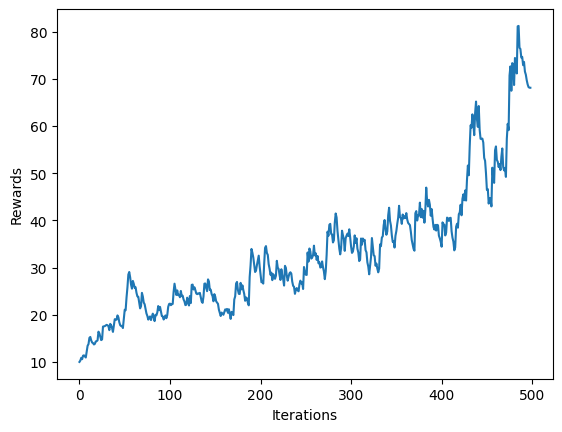

1/1 [==============================] - 0s 26ms/step


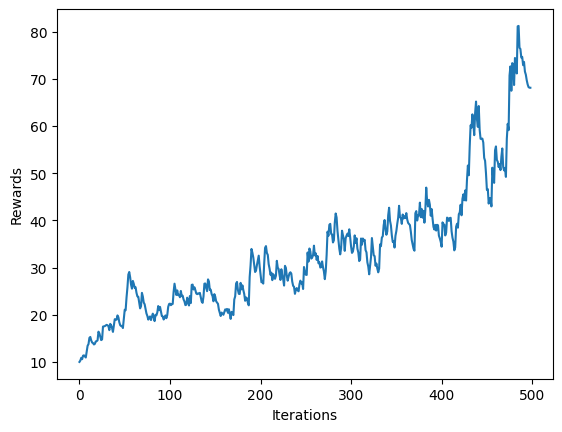

In [ ]:
### Cartpole training! ###

# Learning rate and optimizer
learning_rate = 1e-3
optimizer = tf.keras.optimizers.Adam(learning_rate)

# instantiate cartpole agent
cartpole_model = create_cartpole_model()

# to track our progress
smoothed_reward = mdl.util.LossHistory(smoothing_factor=0.9)
plotter = mdl.util.PeriodicPlotter(sec=2, xlabel='Iterations', ylabel='Rewards')

if hasattr(tqdm, '_instances'): tqdm._instances.clear() # clear if it exists
for i_episode in range(500):

  plotter.plot(smoothed_reward.get())

  # Restart the environment
  observation = env.reset()
  memory.clear()

  while True:
      # using our observation, choose an action and take it in the environment
      action = choose_action(cartpole_model, observation)
      next_observation, reward, done, info = env.step(action)
      # add to memory
      memory.add_to_memory(observation, action, reward)

      # is the episode over? did you crash or do so well that you're done?
      if done:
          # determine total reward and keep a record of this
          total_reward = sum(memory.rewards)
          smoothed_reward.append(total_reward)

          # initiate training - remember we don't know anything about how the
          #   agent is doing until it has crashed!
          train_step(cartpole_model, optimizer,
                     observations=np.vstack(memory.observations),
                     actions=np.array(memory.actions),
                     discounted_rewards = discount_rewards(memory.rewards))

          # reset the memory
          memory.clear()
          break
      # update our observatons
      observation = next_observation

In [ ]:
import gym
# Import Monitor from gym.wrappers.record_video
from gym.wrappers.record_video import RecordVideo
import numpy as np # Import numpy for reshaping

def save_video_of_model(model, env_name, filename='cartpole'):
    env = gym.make(env_name)
    # Use RecordVideo instead of Monitor
    env = RecordVideo(env, "./gym-results")

    observation = env.reset()
    for _ in range(1000):
        env.render()
        # Reshape the observation to a batch of size 1
        action = model.predict(observation[np.newaxis, :])
        # Take the action with the highest probability
        action = np.argmax(action) # Change is on this line
        observation, reward, done, info = env.step(action)
        if done:
            break
    env.close()

# Instantiate or load your trained Cartpole model here
cartpole_model = create_cartpole_model() # Replace with your model creation function
save_video_of_model(cartpole_model, "CartPole-v0")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/gym/envs/registration.py:593: UserWarning: WARN: The environment CartPole-v0 is out of date. You should consider upgrading to version `v1`.
  logger.warn(
/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns 

1/1 [==============================] - 0s 18ms/step


/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):
/usr/local/lib/python3.10/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


1/1 [==============================] - 0s 19ms/step


In [ ]:
!pip install --upgrade mitdeeplearning

In [ ]:
import gym
from gym.wrappers.record_video import RecordVideo
import numpy as np
from IPython.display import Video # Import Video for displaying

def save_video_of_model(model, env_name, filename='cartpole'):
    env = gym.make(env_name)
    env = RecordVideo(env, "./gym-results")

    observation = env.reset()
    for _ in range(1000):
        env.render()
        action = model.predict(observation[np.newaxis, :])
        action = np.argmax(action)
        observation, reward, done, info = env.step(action)
        if done:
            break
    env.close()

    # Display the saved video
    return Video("./gym-results/rl-video-episode-0.mp4", embed=True) # Assuming the video is named 'rl-video-episode-0.mp4'

# Instantiate or load your trained Cartpole model here
cartpole_model = create_cartpole_model() # Replace with your model creation function
video = save_video_of_model(cartpole_model, "CartPole-v0")
display(video) # Display the video in the notebook

/usr/local/lib/python3.10/dist-packages/gym/envs/registration.py:593: UserWarning: WARN: The environment CartPole-v0 is out of date. You should consider upgrading to version `v1`.
  logger.warn(
/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/record_video.py:78: UserWarning: WARN: Overwriting existing videos at /content/gym-results folder (try specifying a different `video_folder` for the `

1/1 [==============================] - 0s 23ms/step


/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):
/usr/local/lib/python3.10/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


1/1 [==============================] - 0s 17ms/step
